##### Properties of DFT

##### DATE: 29/09/2023 

##### AIM:
Write a program to verify the following properties of DFT 
1. Duality 
2) Multiplication 
3) Circular convolution 
4) Parseval’s theorem. 



##### SOFTWARE USED:
Python

##### THEORY:
1. Duality property: 
Let us consider a signal x(n), whose DFT is given as X(k). Let the finite duration sequence be XNN. Then according to duality theorem, 
If, x(n)⟷X(K) => X(N)⟷Nx[((−k)) . 
So, by using this theorem if we know DFT, we can easily find the finite duration sequence. 

2. Multiplication: 
If there are two signal x1(n) and x2(n) and their respective DFTs are X1(k) and X2(K), then multiplication of signals in time sequence corresponds to circular convolution of their DFTs. 
If, x1(n)⟷X1(K) & x2(n)⟷X2(K) 
then, x1(n) x x2(n)⟷X1(K)©X2(K) => Circular convolution 

3. Circular convolution: 
Circular convolution using Matrix method represents the two given sequence x1(n) and x2(n) in matrix form. 
One of the given sequences is repeated via circular shift of one sample at a time to form an N X N matrix. 
The other sequence is represented as column matrix. 
The multiplication of two matrices give the result of circular convolution.
4. Parseval’s theorem: 
The Parseval’s theorem expresses the energy of a signal in time-domain in terms of the average energy in its frequency components.
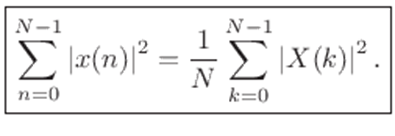

##### CODE:

In [2]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [3]:
def repeat():
    x1 = np.array(input("Enter the elements of the 1st input sequence:").split(",")).astype(complex)
    x2 = np.array(input("Enter the elements of the 2nd input sequence:").split(",")).astype(complex)
    k1 = len(x1)
    k2 = len(x2)
    a1 = int(input('enter constant for 1st input sequence'))
    a2 = int(input('enter constant for 2nd input sequence'))
    print(k1,k2,x1,x2,a1,a2)
    return k1,k2,x1,x2,a1,a2
k1,k2,x1,x2,a1,a2 = repeat()

5 5 [1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j] [2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j] 3 4


In [7]:
def dft(x,k):
    y = np.zeros(k,dtype = 'complex')
    for i in range (k):
        sum = 0
        for m in range (k):
            sum += x[m]*np.exp(complex(-1j)*2*np.pi*i*m*float(1/k))
        y[i] = sum
    return y
def idft(x,k):
    y = np.zeros(k,dtype = 'complex')
    
    for i in range (k):
      sum = 0
      for m in range (k):
        sum += x[m]*np.exp(complex(1j)*2*np.pi*i*m*float(1/k))
      y[i] = sum/k
    return y
def fconvolve(x,y):
    return np.fft.ifft( np.fft.fft(x)*np.fft.fft(y) )
def tconvolve(x,y):
    twiddle = []
    hn = []
    for i in range(len(x)):
        if i != 0:
            x = np.roll(x,1) 
        twiddle.append(x)
        hn.append([y[i]])
    # print(twiddle)
    print(np.array(hn))
    print(np.transpose(twiddle))
    # print(np.dot(np.transpose(twiddle),hn))
    return np.transpose(np.dot(np.transpose(twiddle),hn))

In [4]:
def check():
    print('Unequal length of arrays, try again')
    k1,k2,x1,x2,a1,a2 = repeat()
    if k1!=k2: 
        check()
    return k1,k2,x1,x2,a1,a2
k1,k2,x1,x2,a1,a2 = check()
if k1!=k2: 
        k1,k2,x1,x2,a1,a2 = check()
X1 = dft(x1,k1)
X2 = dft(x2,k2)
print(k1,k2,x1,x2,a1,a2)
LHS = dft((a1*x1) + (a2*x2),k1)
RHS = (a1*X1) + (a2*X2)
flag = 1
LHS = np.round_(LHS, decimals = 3)
RHS = np.round_(RHS, decimals = 3)
for i in range(k1):
    if LHS[i] != RHS[i]:
        print(LHS[i])
        print(RHS[i])
        flag = 0
        break
if flag == 1:
    print('Linearity verified: ')
    print('LHS: ', LHS, 'RHS: ', RHS, sep='\n')
else:
    print('Linearity Failed')
    print('LHS: ', LHS, 'RHS: ', RHS, sep='\n')

Unequal length of arrays, try again
5 5 [1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j] [2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j] 2 3
5 5 [1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j] [2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j] 2 3
Linearity verified: 
LHS: 
[ 90.  +0.j    -12.5+17.205j -12.5 +4.061j -12.5 -4.061j -12.5-17.205j]
RHS: 
[ 90.  +0.j    -12.5+17.205j -12.5 +4.061j -12.5 -4.061j -12.5-17.205j]


In [5]:
LHS = dft(x1*x2, k1)
RHS = fconvolve(X1,X2)/k1
flag = 1
LHS = np.round_(LHS, decimals = 1)
RHS = np.round_(RHS, decimals = 1)
for i in range(k1):
    if LHS[i] != RHS[i]:
        print(LHS[i])
        print(RHS[i])
        flag = 0
        break
if flag == 1:
    print('Multiplication verified: ')
    print('LHS: ', LHS, 'RHS: ', RHS, sep='\n')
else:
    print('Multiplication property Failed')
    print('LHS: ', LHS, 'RHS: ', RHS, sep='\n')

Multiplication verified: 
LHS: 
[ 70.  +0.j  -12.8+27.5j -17.2 +6.5j -17.2 -6.5j -12.8-27.5j]
RHS: 
[ 70.  +0.j  -12.8+27.5j -17.2 +6.5j -17.2 -6.5j -12.8-27.5j]


In [8]:
LHS = tconvolve(x1,x2)
RHS = idft(X1*X2,k1)
flag = 1
LHS = np.round_(LHS, decimals = 1)
RHS = np.round_(RHS, decimals = 1)
for i in range(k1):
    if LHS[0][i] != RHS[i]:
        print(LHS[0][i])
        print(RHS[i])
        flag = 0
        break
if flag == 1:
    print('Multiplication verified: ')
    print('LHS: ', LHS[0], 'RHS: ', RHS, sep='\n')
else:
    print('Multiplication property Failed')
    print('LHS: ', LHS[0], 'RHS: ', RHS, sep='\n')

[[2.+0.j]
 [3.+0.j]
 [4.+0.j]
 [5.+0.j]
 [6.+0.j]]
[[1.+0.j 5.+0.j 4.+0.j 3.+0.j 2.+0.j]
 [2.+0.j 1.+0.j 5.+0.j 4.+0.j 3.+0.j]
 [3.+0.j 2.+0.j 1.+0.j 5.+0.j 4.+0.j]
 [4.+0.j 3.+0.j 2.+0.j 1.+0.j 5.+0.j]
 [5.+0.j 4.+0.j 3.+0.j 2.+0.j 1.+0.j]]
Multiplication verified: 
LHS: 
[60.+0.j 65.+0.j 65.+0.j 60.+0.j 50.+0.j]
RHS: 
[60.-0.j 65.+0.j 65.+0.j 60.+0.j 50.-0.j]


In [9]:
LHS1 = 0
RHS1 = 0
LHS2 = 0
RHS2 = 0
for i in range(len(x1)):
    LHS1 += abs(x1[i])**2
    LHS2 += abs(x2[i])**2
    RHS1 += abs(X1[i])**2
    RHS2 += abs(X2[i])**2
LHS1 = np.round_(LHS1, decimals = 3)
LHS2 = np.round_(LHS2, decimals = 3)
RHS1 = np.round_(RHS1, decimals = 3)
RHS2 = np.round_(RHS2, decimals = 3)
RHS1 = RHS1/k1
RHS2 = RHS2/k1
if LHS1 == RHS1:
    print("Parseval's theorem verified: for input1")
    print('LHS: ', LHS1, 'RHS: ', RHS1, sep='\n')
else:
    print("Parseval's theorem Failed")
    print('LHS: ', LHS1, 'RHS: ', RHS1, sep='\n')
if LHS2 == RHS2:
    print("Parseval's theorem verified: for input1")
    print('LHS: ', LHS2, 'RHS: ', RHS2, sep='\n')
else:
    print("Parseval's theorem Failed")
    print('LHS: ', LHS2, 'RHS: ', RHS2, sep='\n')

Parseval's theorem verified: for input1
LHS: 
55.0
RHS: 
55.0
Parseval's theorem verified: for input1
LHS: 
90.0
RHS: 
90.0


: 

##### RESULT: 
Successfully proved properties of DFT
